## Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [6]:
data = pd.read_csv('Position_Salaries.csv')

In [7]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [52]:
X= data.iloc[:,1:-1].values
y = data.iloc[:,-1:].values

## Implementing Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [55]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [56]:
y = y.ravel()

## Training the data on SVR (Support Vector Regression) model

In [57]:
from sklearn.svm import SVR

In [58]:
regressor = SVR()

In [59]:
regressor.fit(X, y)

SVR()

## Predicting the result using our newly trained SVR model

In [63]:
result = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

In [70]:
print(f"The salary as per SVR with position level 6.5 is: {result[0][0]}")

The salary as per SVR with position level 6.5 is: 170370.02040650236


## Visualizing SVR result

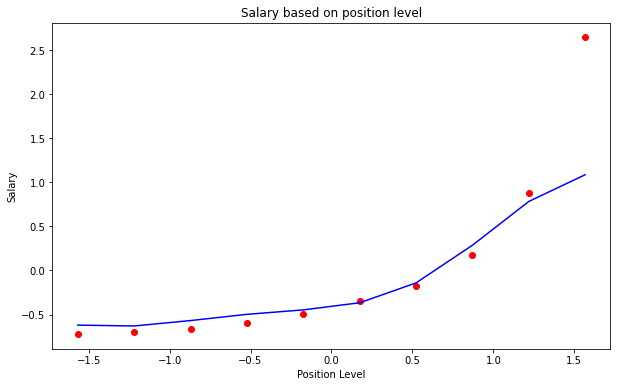

In [88]:
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.title("Salary based on position level")
plt.show()